# Telco Customer Churn
## Problem Definition
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs."
## Data
Got this data from kaggle:

https://www.kaggle.com/datasets/blastchar/telco-customer-churn

## Evaluation

As always try to make model more and more reliable

## Features



## Modelling

**We will try Deep learning and some of the other sklearn models**

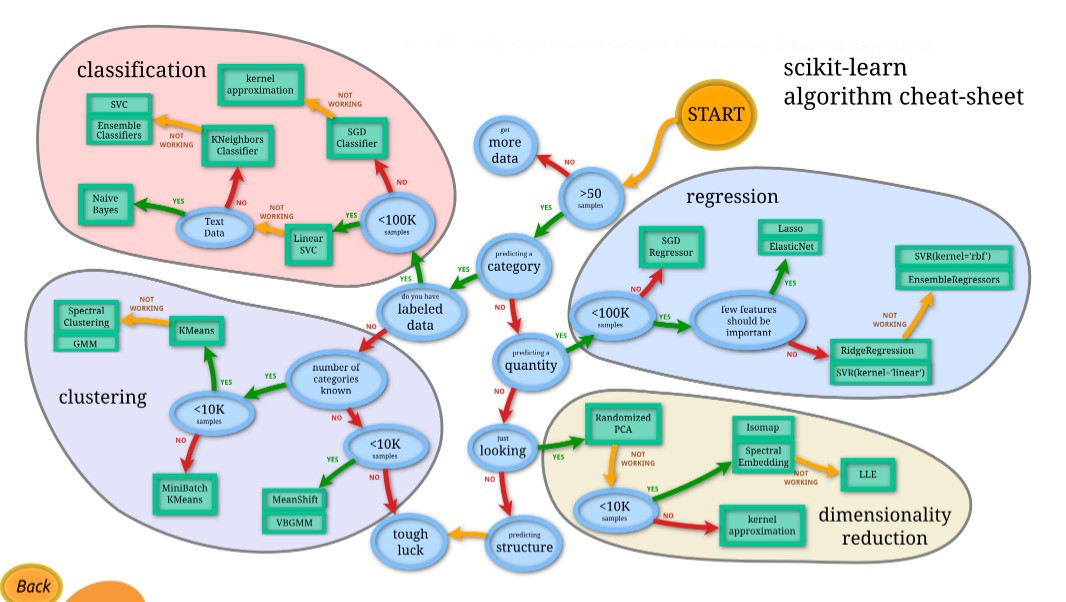

In [7]:
from IPython.display import Image
Image(filename="drive/MyDrive/Telco Customer Churn/sklearn cheat.jpg")

In [8]:
# from google.colab import drive
# drive.mount('/content/drive')

#import necessary libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#import file
df=pd.read_csv("drive/MyDrive/Telco Customer Churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [11]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Cleaning and visualization

* massive amount of people leaving the Service could be due to two conditions
1. Less Tenure Time
2. More Charges

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


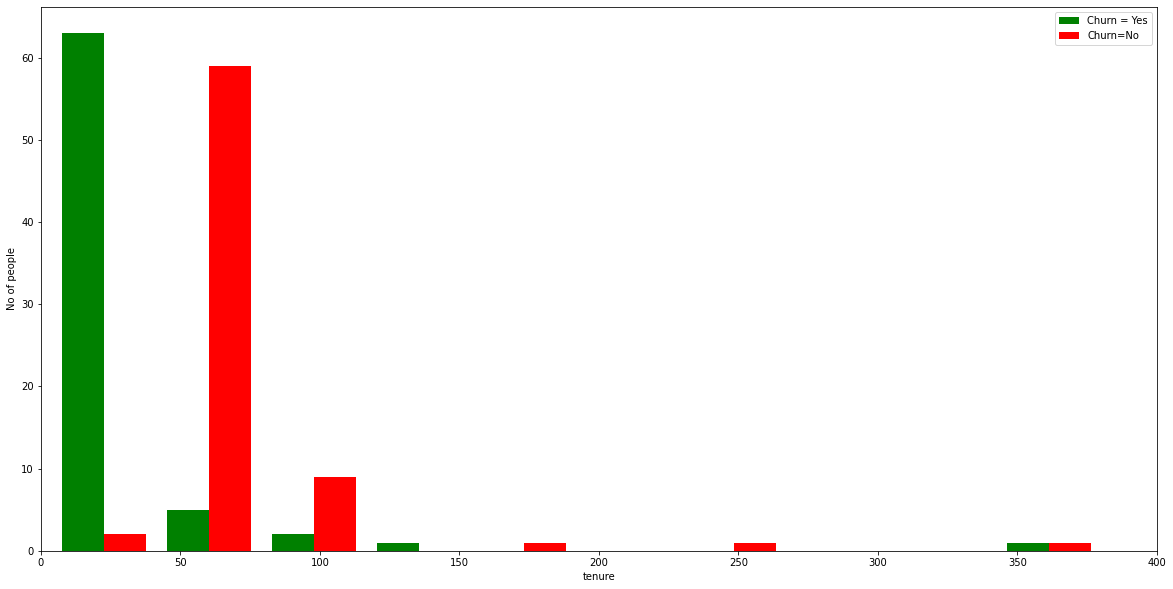

In [12]:
# Less Tenure Time
df1=df[df['Churn']=='Yes']['tenure'].value_counts()
df2=df[df['Churn']=='No']['tenure'].value_counts()
plt.figure(figsize=(20,10))
plt.hist([df1,df2],color=['green','red'])
plt.legend(['Churn = Yes','Churn=No'])
plt.xlabel('tenure')
plt.ylabel('No of people')
plt.xlim(0,400)
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


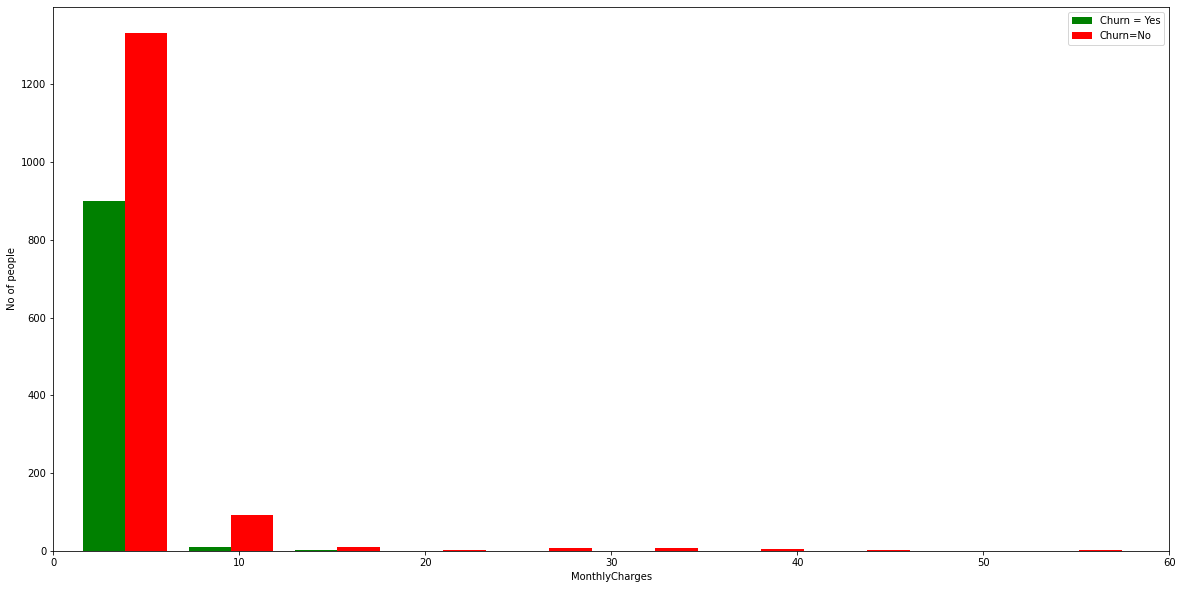

In [13]:
# Charges
df1=df[df['Churn']=='Yes']['MonthlyCharges'].value_counts()
df2=df[df['Churn']=='No']['MonthlyCharges'].value_counts()
plt.figure(figsize=(20,10))
plt.hist([df1,df2],color=['green','red'])
plt.legend(['Churn = Yes','Churn=No'])
plt.xlabel('MonthlyCharges')
plt.ylabel('No of people')
plt.xlim(0,60)
plt.show()

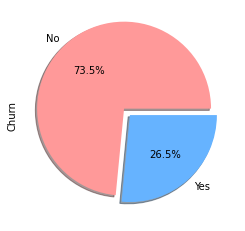

In [14]:
# After this analyzed data was create lets compare the people leaving and not leaving
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%',explode=[0.1,0],colors=['#ff9999','#66b3ff'],shadow=True)

**Still the company is trustable by a majority**

# Cleaning the Data

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Which `InternetService` is best near to the customer**

In [16]:
df1=pd.crosstab(df['InternetService'],df['Churn'])
df1

Churn,No,Yes
InternetService,,
DSL,1962,459
Fiber optic,1799,1297
No,1413,113


Text(0, 0.5, ' ')

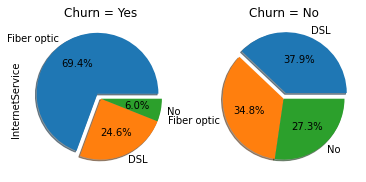

In [17]:
df1=df[df['Churn']=='Yes']['InternetService'].value_counts()
df2=df[df['Churn']=='No']['InternetService'].value_counts()
plt.subplot(1,2,1)
df1.plot.pie(autopct="%1.1f%%",explode=[0.1,0,0],shadow=True)
plt.title('Churn = Yes')
plt.subplot(1,2,2)
df2.plot.pie(autopct="%1.1f%%",explode=[0.1,0,0],shadow=True)
plt.title('Churn = No')
plt.ylabel(" ")

In [18]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [19]:
# No need for customerID
df.drop('customerID',axis=1,inplace=True)

In [20]:
# Total Charge should have numerical data types
df['TotalCharges']=pd.to_numeric(df['TotalCharges'])

ValueError: ignored

In [22]:
# contains " " space
df[df['TotalCharges']==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [23]:
len(df[df['TotalCharges']==" "])

11

In [24]:
# I think we can drop these entries 
len(df)-11

7032

In [25]:
# lets drop na
df=df[df['TotalCharges']!=" "]

In [26]:
len(df)

7032

In [27]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
df['TotalCharges'].dtype

dtype('float64')

In [29]:
for lab in df:
  print(f"{lab} : {df[lab].unique()}")

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78

In [30]:
 c=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
     'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']
df[c]=df[c].replace({'Yes':1,'No':0})

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [31]:
for lab in df:
    print(f"{lab} : {df[lab].unique()}")

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : ['No phone service' 0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1 'No internet service']
OnlineBackup : [1 0 'No internet service']
DeviceProtection : [0 1 'No internet service']
TechSupport : [0 1 'No internet service']
StreamingTV : [0 1 'No internet service']
StreamingMovies : [0 1 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Chu

lets go through with `No internet service` and `No phone service`

In [32]:
No_internet_service=['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
df[No_internet_service]=df[No_internet_service].replace({'No internet service':0})

In [33]:
for lab in df:
    print(f"{lab} : {df[lab].unique()}")

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : ['No phone service' 0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : ['No' 'Yes']


In [34]:
df['MultipleLines']=df['MultipleLines'].replace({'No phone service':0})

In [35]:
df['gender']=df['gender'].replace({'Male':1,'Female':0})

In [36]:
for lab in df:
    print(f"{lab} : {df[lab].unique()}")

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : ['No' 'Yes']


In [37]:
x=df.drop('Churn',axis=1)
y=df['Churn']

In [38]:
cat=['PaymentMethod','Contract','InternetService']
x=pd.get_dummies(x)

In [39]:
len(x.columns)

26

In [40]:
len(df.columns)

20

# Modelling

In [41]:
# Go back to Telco Customer Churn Heading to select the models

In [42]:
from sklearn.svm import LinearSVC #Model One
from sklearn.neighbors import KNeighborsClassifier # Model Two
from sklearn.ensemble import GradientBoostingClassifier # Model Three
from sklearn.ensemble import RandomForestClassifier # Model Four
# Fifth Model = Neural Networks  

# Splitting the data

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [44]:
len(x_train)

5625

In [45]:
len(x_train.columns)

26

Lets Start with 
**Neural Network**

In [46]:
import tensorflow as tf
import tensorflow_hub as hub
# Train
x_train_trans=x_train.copy()
y_train_trans=y_train.copy()
x_train_trans = tf.convert_to_tensor(x_train_trans,tf.float32)
y_train_trans = y_train_trans.replace({'Yes':1,'No':0})
y_train_trans = tf.convert_to_tensor(y_train_trans,tf.float32)
#test
x_test_trans=x_test.copy()
y_test_trans=y_test.copy()
x_test_trans = tf.convert_to_tensor(x_test_trans,tf.float32)
y_test_trans = y_test_trans.replace({'Yes':1,'No':0})
y_test_trans = tf.convert_to_tensor(y_test_trans,tf.float32)

In [47]:
def create_model (input_shape=26,output_shape=1):
  #create
  model=tf.keras.Sequential([
                       tf.keras.layers.Dense(units=1,activation='sigmoid')
  ])
  #compile
  model.compile(
      loss=tf.keras.losses.BinaryCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=['accuracy']
  )
  model.build((None,26))
  return model

In [48]:
def tuples (x,y=None,test_data=False):
  if test_data:
    return x
  else:
    return x,y


In [49]:
model=create_model()

In [50]:
len(x_train_trans)

5625

In [51]:
np.random.seed(42)
model.fit(x_train_trans,y_train_trans,epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 51.1215 - accuracy: 0.7524
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 9.9602 - accuracy: 0.6078
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 5.2620 - accuracy: 0.5788
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 2.8053 - accuracy: 0.6197
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.9946 - accuracy: 0.7230
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4853 - accuracy: 0.7835
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4835 - accuracy: 0.7804
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4796 - accuracy: 0.7849
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4721 - accuracy: 0.7860
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4603 - accur

In [52]:
np.random.seed(42)
model.evaluate(x_test_trans,y_test_trans)

44/44 [==============================] - 0s 1ms/step - loss: 0.4355 - accuracy: 0.7839


[0.4355427026748657, 0.7839374542236328]

In [53]:
model_accuracies={}
np.random.seed(42)
model_accuracies['Neural Network']=model.evaluate(x_test_trans,y_test_trans)
model_accuracies

44/44 [==============================] - 0s 1ms/step - loss: 0.4355 - accuracy: 0.7839


{'Neural Network': [0.4355427026748657, 0.7839374542236328]}

In [54]:
pred=model.predict(x_test_trans)

In [55]:
pred[1]

array([0.14143056], dtype=float32)

In [56]:
x_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6030,0,0,0,0,43,0,0,0,0,1,...,1,0,0,1,0,0,1,0,0,0
3410,1,0,0,0,3,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
5483,0,0,1,0,55,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
5524,1,0,1,1,45,1,0,1,0,0,...,1,0,0,0,0,1,1,0,0,0
6337,0,0,1,1,55,1,1,1,0,0,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,1,0,0,0,3,1,1,0,0,0,...,1,0,0,1,0,0,1,0,0,0
5199,0,0,0,0,51,1,1,0,1,1,...,0,1,0,0,1,0,0,0,1,0
5235,1,0,0,0,9,1,1,1,0,0,...,0,1,0,1,0,0,0,0,1,0
5399,0,0,0,0,50,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0


In [57]:
# svm
np.random.seed(42)
svm_model_base = LinearSVC()
svm_model_base.fit(x_train,y_train)
model_accuracies['LinearSVC']=svm_model_base.score(x_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [58]:
# neighbor
np.random.seed(42)
kn_model_base = KNeighborsClassifier()
kn_model_base.fit(x_train,y_train)
model_accuracies['KNeighborsClassifier']=kn_model_base.score(x_test,y_test)

In [59]:
#Gradient 
np.random.seed(42)
g_model_base=GradientBoostingClassifier()
g_model_base.fit(x_train,y_train)
model_accuracies['GradientBoostingClassifier']=g_model_base.score(x_test,y_test)

In [60]:
#Random Forest
np.random.seed(42)
f_model_base=RandomForestClassifier()
f_model_base.fit(x_train,y_train)
model_accuracies['RandomForestClassifier']=f_model_base.score(x_test,y_test)

In [61]:
model_accuracies

{'GradientBoostingClassifier': 0.7945984363894811,
 'KNeighborsClassifier': 0.7711442786069652,
 'LinearSVC': 0.7057569296375267,
 'Neural Network': [0.4355427026748657, 0.7839374542236328],
 'RandomForestClassifier': 0.783226723525231}

**We will move with `GradientBoostingClassifier()`**

In [62]:
np.random.seed(42)
grid={'loss':['log_loss', 'exponential'],
     'n_estimators':[50,100,150],
     'criterion':['friedman_mse', 'squared_error'],
     'init':['estimator','zero',None],
     'max_features':['sqrt', 'log2',None],
     }
from sklearn.model_selection import GridSearchCV
g_model_grid=GridSearchCV(estimator=GradientBoostingClassifier(),
                          param_grid=grid,
                         verbose=True,
                         cv=5)
g_model_grid.fit(x_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
360 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 525, in fit
    self._check_params()
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 282, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'log_loss' n

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'init': ['estimator', 'zero', None],
                         'loss': ['log_loss', 'exponential'],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [50, 100, 150]},
             verbose=True)

In [63]:
g_model_grid.score(x_test,y_test)

0.7853589196872779

 lets Create a `evaluation` function 

In [64]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,g_model_base.predict(x_test)))

              precision    recall  f1-score   support

          No       0.83      0.90      0.87      1033
         Yes       0.65      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.79      1407



In [65]:
c=confusion_matrix(y_test,g_model_base.predict(x_test))
c

array([[931, 102],
       [187, 187]])

(array([0.5, 1.5]), <a list of 2 Text major ticklabel objects>)

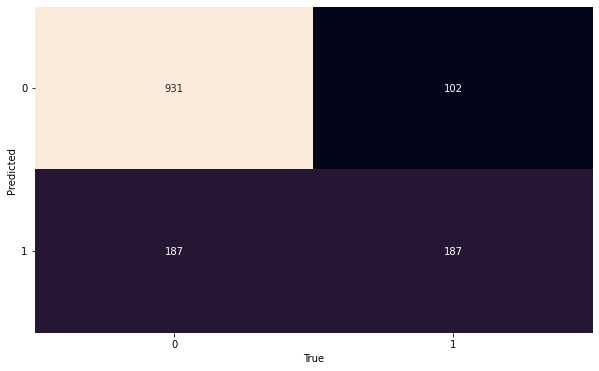

In [66]:
plt.figure(figsize=(10,6))
sns.heatmap(c,annot=True,cbar=False,fmt='g');
plt.xlabel('True')
plt.ylabel('Predicted')
plt.yticks(rotation=0)

In [67]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [68]:
print('Accuracy : ',accuracy_score(y_test,g_model_base.predict(x_test)))

Accuracy :  0.7945984363894811


HOOOO ! OK
Done this Project `g_model_base` can be used to predict whether a person is going to leave the company or not by entering the features on which the model is trained can guide company either by changing a service can hold the customer from leaving